In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
train_full_data = pd.read_csv('https://raw.githubusercontent.com/NHANGIOI/Machine_Learning/refs/heads/main/home-data-for-ml-course/train.csv')
x_test = pd.read_csv('https://raw.githubusercontent.com/NHANGIOI/Machine_Learning/refs/heads/main/home-data-for-ml-course/test.csv')

x_train, x_valid, y_train, y_valid = train_test_split(train_full_data.copy().drop(columns = ['SalePrice']),train_full_data['SalePrice'],
                                                      train_size = 0.8, test_size = 0.2,random_state = 0)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

numerical_col = [col for col in x_train.columns if x_train[col].dtype in ['int','float']]
caterical_col = [col for col in x_train.columns if x_train[col].dtype == 'object']

pre_processor = ColumnTransformer(transformers = [
    ('num',SimpleImputer(strategy = 'constant'),numerical_col),
    ('cat',Pipeline( steps = [
        ('missing',SimpleImputer(strategy = 'most_frequent')),
        ('encode',OneHotEncoder(handle_unknown = 'ignore'))
    ]),caterical_col)
])
def run_model(n_estimators : int,output : bool):
    my_model = Pipeline(steps = [
        ('preprocess',pre_processor),
        ('model',XGBRegressor(
            n_estimators = n_estimators,
            learning_rate = 0.05,
            n_jobs = 4
        ))
    ])
    my_model.fit(x_train,y_train)
    if output == False:
        MAE = mean_absolute_error(my_model.predict(x_valid),y_valid)
        return MAE
    else:
        preds = my_model.predict(x_test)
        return preds
        

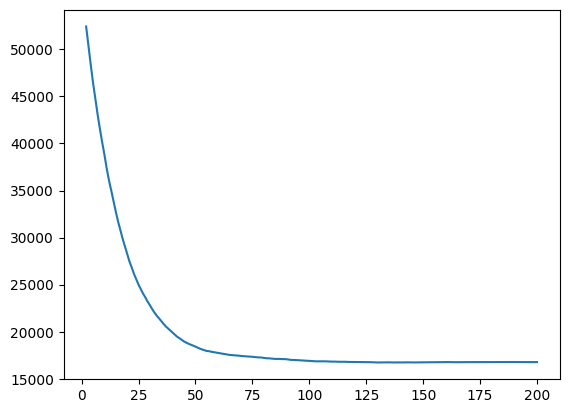

In [ ]:
import matplotlib.pyplot as plt
list_mae = {}
for i in range(2,201):
    list_mae[i] = run_model(i,False)
    
plt.plot(list(list_mae.keys()),list(list_mae.values()))
plt.show()

In [10]:
preds = run_model(1000,True)
output = pd.DataFrame({
    'Id' : x_test['Id'],
    'SalePrice' : preds
})
output.to_csv('submission.csv',index = False)

KeyboardInterrupt: 